# Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
# Ensure the created graphs are displayed without the need to "call" them specifically

%matplotlib inline

In [4]:
# Define the path
path = "/Users/ol/anaconda_projects/2025_02 World University Rankings/02 Data/Prepared Data/df_times.csv"

# Import CSV
df = pd.read_csv(path)

# The elbow technique

In [6]:
# Define the range of potential clusters in the data

num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [7]:
# Keep only numeric columns

df_numeric = df.select_dtypes(include=['number']) 

In [8]:
# Define different cluster options
kmeans = [KMeans(n_clusters=i, random_state=0) for i in range(1, 11)]  

# Calculate scores
score = [k.fit(df_numeric).score(df_numeric) for k in kmeans]

score

[-96741166.68948808,
 -36298519.959315255,
 -15389542.76709032,
 -10194312.456496798,
 -7815566.330767008,
 -6281328.872896717,
 -5452243.096911686,
 -4589126.479090696,
 -4218726.152061248,
 -3927905.865745604]

In [9]:
# Keep the first 9 values

score = score[:len(num_cl)]  

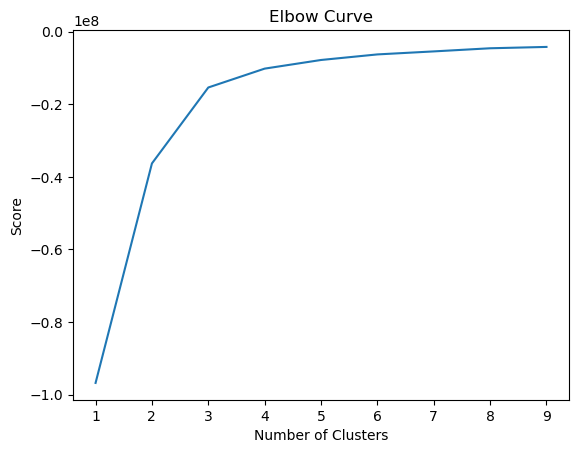

In [10]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal number of clusters is 3 or 4, as adding more does not improve segmentation much. More than 5 clusters may lead to overfitting. Choosing k = 3 or 4 ensures a good balance between accuracy and simplicity. 

# k-means clustering

In [13]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3) 

In [14]:
# Fit the k-means object to the data

kmeans.fit(df_numeric)

KMeans(n_clusters=3)

In [15]:
df['clusters'] = kmeans.fit_predict(df_numeric)

In [16]:
df['clusters'].value_counts()

clusters
0    1201
1    1102
2     300
Name: count, dtype: int64

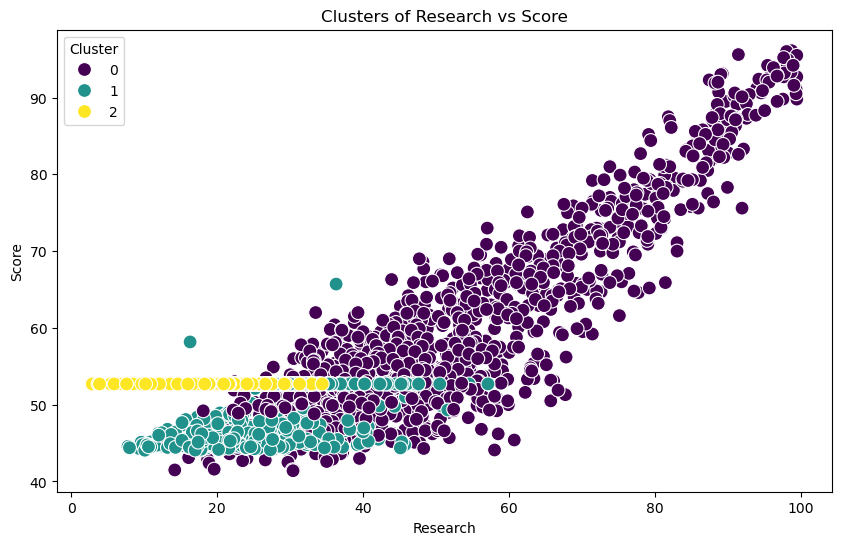

In [17]:
# Create scatter plot for clustering results
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['research'], y=df['score'], hue=df['clusters'], palette="viridis", s=100)

# Customize the plot
ax.grid(False)  
plt.xlabel('Research')  
plt.ylabel('Score')  
plt.title('Clusters of Research vs Score')  
plt.legend(title="Cluster")  

# Show the plot
plt.show()

Most universities follow a strong research-score trend (Cluster 0). Cluster 1 may show schools with similar scores but varying research, suggest a fixed minimum score or influence of other ranking factors, or data inconsistencies. Cluster 2 includes low-research universities with different scores. 

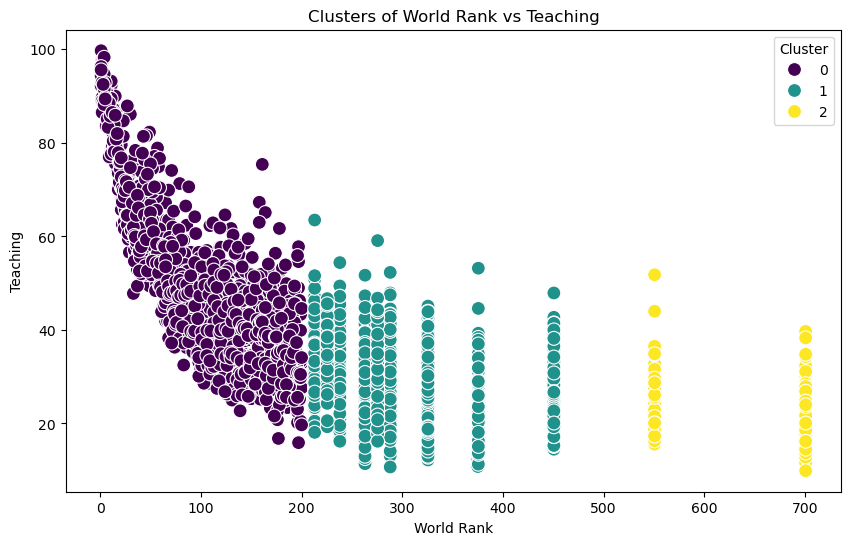

In [19]:
# Create scatter plot for clustering results
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['world_rank'], y=df['teaching'], hue=df['clusters'], palette="viridis", s=100)

# Customize the plot
ax.grid(False)  
plt.xlabel('World Rank')  
plt.ylabel('Teaching')  
plt.title('Clusters of World Rank vs Teaching')  
plt.legend(title="Cluster")  

# Show the plot
plt.show()

Top-ranked universities (Cluster 0) have high teaching scores, showing a strong link between teaching quality and ranking. Mid-ranked schools (Cluster 2) have mixed teaching scores, suggesting other factors influence their rank. Lower-ranked universities (Cluster 1) consistently have low teaching scores, confirming that strong teaching is key but not the only ranking factor. 

The vertical lines show universities with the same world rank but different teaching scores. This suggests tied rankings, grouped rankings, or variations in other factors like research and citations.

In [21]:
df.loc[df['clusters'] == 2, 'cluster'] = 'yellow'
df.loc[df['clusters'] == 1, 'cluster'] = 'green'
df.loc[df['clusters'] == 0, 'cluster'] = 'purple'

In [22]:
df.groupby('cluster').agg({'research':['mean', 'median'], 
                         'score':['mean', 'median'], 
                         'world_rank':['mean', 'median'],
                          'teaching':['mean', 'median']})

research             score         world_rank          teaching  \
              mean median       mean median        mean median       mean   
cluster                                                                     
green    23.973866   22.7  50.795644   52.7  313.475953  325.5  28.012704   
purple   52.252040   48.5  59.846128   56.0  100.233972  100.0  50.730808   
yellow   14.335000   13.4  52.700000   52.7  650.500000  700.5  21.998667   

                
        median  
cluster         
green    27.10  
purple   47.50  
yellow   20.85

These insights help universities improve rankings, predict future scores, and guide better resource allocation.